In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

import healpy as hp
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db


In [2]:
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams['axes.labelsize'] = 16

In [3]:
# load opsim database
dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases

# output directory
outDir = '/home/idies/workspace/Temporary/lixl/scratch/outDir'
resultsDb = db.ResultsDb(outDir=outDir)


In [4]:
# get the name of all opsim dbs 
import glob

workpath = os.getcwd()
#workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns'

os.chdir(dbpath)  # change to opsim database directory
dblist_all = glob.glob('*.db') 
os.chdir(workpath) # change back to work directory
dblist_all.sort()


In [5]:
dblist_all[5]

'baseline_v1.5_10yrs.db'

In [6]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_samefilt_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_d

In [15]:
# check proposal information
propdic = {}
for dbname in dblist_all:
    #dbname=dblist_all[4]
    #dbname="pair_strategy_0_v1.5_10yrs.db"
    #dbname = "sat_dodge_v1.4_10yrs.db"
    opsdb = db.OpsimDatabase(dbpath+dbname)
    
    propInfo = opsdb.fetchPropInfo()[0]
    print(dbname, )
    propdic[dbname] = propInfo

agnddf_v1.5_10yrs.db
alt_dust_v1.5_10yrs.db
alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db
baseline_2snaps_v1.5_10yrs.db
baseline_samefilt_v1.5_10yrs.db
baseline_v1.5_10yrs.db
bulges_bs_v1.5_10yrs.db
bulges_bulge_wfd_v1.5_10yrs.db
bulges_cadence_bs_v1.5_10yrs.db
bulges_cadence_bulge_wfd_v1.5_10yrs.db
bulges_cadence_i_heavy_v1.5_10yrs.db
bulges_i_heavy_v1.5_10yrs.db
daily_ddf_v1.5_10yrs.db
dcr_nham1_ug_v1.5_10yrs.db
dcr_nham1_ugr_v1.5_10yrs.db
dcr_nham1_ugri_v1.5_10yrs.db
dcr_nham2_ug_v1.5_10yrs.db
dcr_nham2_ugr_v1.5_10yrs.db
dcr_nham2_ugri_v1.5_10yrs.db
descddf_v1.5_10yrs.db
filterdist_indx1_v1.5_10yrs.db
filterdist_indx2_v1.5_10yrs.db
filterdist_indx3_v1.5_10yrs.db
filterdist_indx4_v1.5_10yrs.db
filterdist_indx5_v1.5_10yrs.db
filterdist_indx6_v1.5_10yrs.db
filterdist_indx7_v1.5_10yrs.db
filterdist_indx8_v1.5_10yrs.db
footprint_add_mag_cloudsv1.5_10yrs.db
footprint_big_sky_dustv1.5_10yrs.db
footprint_big_sky_nouiyv1.5_10yrs.db
footprint_big_skyv1.5_10yrs.db
No proposal table available - no 

In [17]:
prop_df = pd.DataFrame(propdic).T
prop_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
agnddf_v1.5_10yrs.db,Other,WFD,DD: EDFS,DD:COSMOS,DD:EDFS,DD:XMM-LSS,DD:ECDFS,DD:ELAISS1,NaN,NaN,NaN,NaN
alt_dust_v1.5_10yrs.db,Other,WFD,DD:XMM-LSS,DD:ELAISS1,DD:EDFS,DD:ECDFS,DD:COSMOS,NaN,NaN,NaN,NaN,NaN


In [18]:
prop_df [ prop_df[1]!='WFD' ]

,0,1,2,3,4,5,6,7,8,9,10,11
footprint_big_wfdv1.5_10yrs.db,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#prop_df.iloc[:40]

#prop_df.iloc[40:]

In [6]:
def RADec2pix(nside, ra, dec, degree=True):
    """
    Calculate the nearest healpixel ID of an RA/Dec array, assuming nside.

    Parameters
    ----------
    nside : int
        The nside value of the healpix grid.
    ra : numpy.ndarray
        The RA values to be converted to healpix ids, in degree by default.
    dec : numpy.ndarray
        The Dec values to be converted to healpix ids, in degree by default.

    Returns
    -------
    numpy.ndarray
        The healpix ids.
    """
    if degree:
        ra = np.radians(ra) # change to radians
        dec = np.radians(dec)
    
    lat = np.pi/2. - dec
    hpid = hp.ang2pix(nside, lat, ra )
    return hpid


In [7]:
from lsst.sims.maf.utils import m52snr

class filterPairTGapsMetric(metrics.BaseMetric):
    """
    returns
    N_v * np.exp(-Dkl) for each fields
    
    Parameters:
        colname: 
        fltpair: filter pair, eg ['r', 'i']
        snr_lim: list, signal to noise ratio (fiveSigmaDepth) threshold for fltpair, default [5, 5]
        filename: output a csv table for time gaps of each field
    
    """

    def __init__(self, colname=['observationStartMJD', 'filter', 'fiveSigmaDepth'], fltpair=['r', 'i'], tmin=0, tmax=1.5/24, bins=50, mag_lim=[18, 18],
                 save_dT=False, filename=None, dataout=True, **kwargs):
        self.colname = colname
        self.filename = filename
        self.fltpair = fltpair
        self.mag_lim = mag_lim
        self.dataout = dataout
        self.tmin = tmin
        self.tmax = tmax
        self.bins = bins
        self.save_dT = save_dT
        
        self.Nrun = 0   # record the how many time run run()
        if filename!=None:
            if os.path.isfile(filename):
                # rm old file
                os.system("rm {}".format(filename))
                
        if self.dataout:
            super().__init__(col=self.colname, metricDtype='object', **kwargs)
        else:
            super().__init__(col=self.colname, metricDtype='float', **kwargs)
    
    def save_to_file(self, dic, filename="test_pkl.pkl"):
        '''save dict item to pickle file'''
        
        #df = self.load_from_pkl(filename)

        #df = df.append(pd.DataFrame(dic), ignore_index=True)

        #df.to_pickle(filename)
        df = pd.DataFrame(dic)
        with open(filename, 'a') as f:
            df.to_csv(f, header=f.tell()==0, index=None)
    
    def get_Dkl_i(self, values):
        '''kl divergence for histogram'''
        if values.any():
            values = values + 0.00001  # make each element non-zero
            prob = (values) / values.sum()  
        
            prob_uni = np.ones( len(prob) ) / len(prob)
            return np.sum( prob_uni * np.log(prob_uni / prob) )
        
        else:
            return np.NaN
        
    def get_FoM_i(self, dT_all, tmin=0, tmax=1.5/24, bins=50):
        """return FoM from array of metricValues"""
                
        dT_tlim = dT_all[(dT_all>tmin)&(dT_all<tmax)] 
        Nv = len(dT_tlim)
    
        values, bins_ = np.histogram(dT_tlim, bins=bins);
    
        Dkl = self.get_Dkl_i(values)
    
        FoM_i = Nv * np.exp(-Dkl)
        
        #print(self.Nrun, len(dT_all), Nv, Dkl, FoM_i)
        return Nv, Dkl, FoM_i, dT_tlim
      
    def run(self, dataSlice, slicePoint=None):
        
        # return all possible time gaps for each fields
        
        f0 = self.fltpair[0]
        f1 = self.fltpair[1]
        
        #check input config
        #print(f0, f1, self.tmin, self.tmax, self.mag_lim)
            
        # sort dataSlice
        
        idx0 = ( dataSlice['filter'] == f0 ) & ( dataSlice['fiveSigmaDepth'] > self.mag_lim[0])
        idx1 = ( dataSlice['filter'] == f1 ) & ( dataSlice['fiveSigmaDepth'] > self.mag_lim[1])
        
        timeCol0 = dataSlice['observationStartMJD'][idx0]
        timeCol1 = dataSlice['observationStartMJD'][idx1]

        timeCol0 = timeCol0.reshape((len(timeCol0), 1))
        timeCol1 = timeCol1.reshape((len(timeCol1), 1))
        
        # calculate time gaps matrix
        diffmat = np.abs( np.subtract(timeCol0, timeCol1.T) ) 
        
        # collect all time gaps
        if f0==f1:
            # get only triangle part
            dt_tri = np.tril(diffmat, -1)
            dT = dt_tri[dt_tri!=0]    # flatten lower triangle 
        else:
            dT = diffmat.flatten()

        Nv, Dkl, FoM_i, dT_tlim = self.get_FoM_i(dT, tmin=self.tmin, tmax=self.tmax, bins=self.bins)
        
        # print(self.Nrun, np.min(dataSlice['fiveSigmaDepth'][idx0]), np.min(dataSlice['fiveSigmaDepth'][idx1]),)
        self.Nrun += 1
        # write results to csv file
        fieldRA = np.mean(dataSlice['fieldRA']) ,
        fieldDec = np.mean(dataSlice['fieldDec']),
        
        if self.save_dT:
            dic = {'Nrun': self.Nrun, 
                'pixId': RADec2pix(nside=16, ra=fieldRA, dec=fieldDec)[0],
                'Nv': Nv,
                'Dkl': Dkl,
                'FoM_i': FoM_i,
                'dT_lim': dT_tlim
                  }
        else:
            dic = {'Nrun': self.Nrun, 
                'pixId': RADec2pix(nside=16, ra=fieldRA, dec=fieldDec)[0],
                'Nv': Nv,
                'Dkl': Dkl,
                'FoM_i': FoM_i,
                # 'dT_lim': dT_tlim
                  }
            
        if self.filename!=None:
            self.save_to_file(dic, filename=self.filename)
        
        if self.dataout:
            # return dT
            result = dic
            return result
        else:
        #    f0 = self.fltpair[0]
        #    f1 = self.fltpair[1]
            result = np.min(dT) if len(dT)!=0 else np.inf
            return float(result) 


In [8]:
def runMetric(dbname, fltpair, ipix_ms=None, nside=16, sqlstr=None,
              colname=['observationStartMJD', 'filter', 'fiveSigmaDepth'],
              tmin=0, tmax=1.5/24, bins=50, mag_lim=[18, 18],
              filename=None, dataout=True, **kwargs
             ):
    """run filterPairTGapsMetric
    dbname: name of opsim database
    fltpair: filter pair, eg: 'ri'
    ipix_ms: pixIds of footprint
    """
    opsdb = db.OpsimDatabase(dbpath+dbname)
    
    #fltpair = ['r', 'i']
    
    if ipix_ms!=None:
        # use UserPointsSlicer for minisurvey
        ra, dec = pix2radec(nside=nside, ipix=ipix_ms)
        slicer = slicers.UserPointsSlicer(ra, dec, latLonDeg=True, badval=0)
    else:
        # use HealpixSlicer 
        slicer = slicers.HealpixSlicer(nside=nside)
    
    # metric, slicer, constraint
    metric = filterPairTGapsMetric( colname=colname, fltpair=fltpair, tmin=tmin, tmax=tmax, bins=bins, mag_lim=mag_lim,
                 filename=filename, dataout=dataout, **kwargs)
    
    sqlconstraint = 'filter in ("{}", "{}")'.format(*fltpair)
    if sqlstr!=None:
        sqlconstraint += ' and {}'.format(sqlstr)
        
    # bundle
    newMetricSky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)
    
    # group bundle
    bundleDict = {'newMetricSky':newMetricSky}
    group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir = outDir, resultsDb=resultsDb)
    
    # run
    group.runAll()
    #group.plotAll(closefigs = False)
    return newMetricSky


In [82]:
# run for baseline
metricSky = runMetric( dbname=dblist_all[4], fltpair=['u', 'r'], ipix_ms=None, nside=16, sqlstr='proposalId=1',
              colname=['observationStartMJD', 'filter', 'fiveSigmaDepth'],
              tmin=0, tmax=1.5/24, bins=50, mag_lim=[18, 18],
              filename=None, dataout=True, save_dT=True)


Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['fieldRA', 'filter', 'fiveSigmaDepth', 'fieldDec', 'observationStartMJD']
Found 482319 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [83]:
arr = metricSky.metricValues.data
arr_valid = arr[ arr != None ]
df = pd.DataFrame.from_records(arr_valid)
df.head(3)

,Dkl,FoM_i,Nrun,Nv,dT_lim,pixId
0,7.755538,0.005140,1,12,"[0.016146125948580448, 0.016141299063747283, 0...",1376
1,8.942927,0.001699,2,13,"[0.016230229804932605, 0.016462671774206683, 0...",1377
2,9.097778,0.001679,3,15,"[0.016320085211191326, 0.016341726717655547, 0...",1378


In [33]:
tmin = 5/60/60/24 # in days
tmax = 1.5/24 
bins = np.linspace(tmin, tmax, 50)
get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)


14165.567066309595

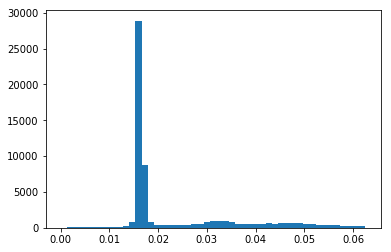

In [35]:
plt.hist(np.concatenate(df.dT_lim), bins=bins);

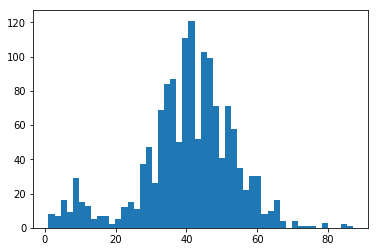

In [37]:
plt.hist(df.Nv[df.Nv>0], bins=50);

In [18]:
dblist_all[5:6]

['baseline_v1.5_10yrs.db']

### run all filter pairs for baseline

In [10]:
fltpairs = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]

In [9]:
def get_Dkl(values):
    '''kl divergence for histogram'''
    if values.any():
        values = values + 0.00001  # make each element non-zero
        prob = (values) / values.sum()  
    
        prob_uni = np.ones( len(prob) ) / len(prob)
        return np.sum( prob_uni * np.log(prob_uni / prob) )
    
    else:
        return np.NaN

def get_FoM_tgaps(df, tmin=0, tmax=1.5/24, bins=50):
    """return FoM from array of metricValues
    Inputs:
     df: pd.DataFrame, cols ['pixId', 'Dkl', 'FoM_i', 'Nv', 'dT_lim']
    """
    
    dT_all = np.concatenate(df.dT_lim.values)
    
    dT_tlim = dT_all[(dT_all>tmin)&(dT_all<tmax)] 
    Nv = len(dT_tlim)

    values, bins_ = np.histogram(dT_tlim, bins=bins);

    Dkl = get_Dkl(values)

    FoM = Nv * np.exp(-Dkl)
    
    return FoM


In [11]:
%%time 
# run all filter pairs for baseline 

dicFoM = {}
dicFoM['db'] = dblist_all[5:6]

nside = 16
# select mini survey footprint 
ipix_ms = None
#sqlstr = "proposalId=1"
sqlstr = "note not like '%DD%'"
magdic = {'u':18, 'g':18, 'r':18, 'i':18, 'z':18, 'y':18}

dataRaw = {}  # save the raw metricValues.data for each opsim each fltpair; dataRaw[fltpair][dbname]

for fltpair in fltpairs: 
    dicFoM[fltpair] = []
    dataRaw[fltpair] = {}
    for dbname in dicFoM['db']: 
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
        else:
            tmin = 5/60/60/24
            #tmax = 1.5/24 # 1.5 hour in days
            tmax = 2 # 1.5 hour in days
            
            bins = np.linspace(tmin, tmax, 50)
            
        metricSky = runMetric(dbname, fltpair=fltpair, sqlstr=sqlstr, nside=nside, ipix_ms=ipix_ms, 
                                 mag_lim=[magdic[fltpair[0]], magdic[fltpair[1]]],
                                 tmin=tmin, tmax=tmax, bins=bins,
                                 filename=None, save_dT=True, dataout=True );
            
        arr = metricSky.metricValues.data 
        df = pd.DataFrame.from_records( arr[ arr != None ] )
        
        FoM_tgaps = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)

        dicFoM[fltpair].append(FoM_tgaps)
        
        dataRaw[fltpair][dbname] = pd.DataFrame.from_records( arr[ arr != None ] )[['pixId', 'Dkl', 'FoM_i', 'Nv']]  
        
        print('>>>', fltpair, dbname, FoM_tgaps)
        
    df_fom = pd.DataFrame(dicFoM)
    df_fom.to_csv('data_v1_5/tgaps_FoM_{}_all_noddf_2d.csv'.format(dbname), index=False)
    # save raw data to pickle
    pd.DataFrame( dataRaw ).to_pickle(outDir+'/dataRaw_v1_5/tgaps_dataRaw_baseline_v1.5_all_noddf_2d.pkl',)


Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 135826 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu baseline_v1.5_10yrs.db 12442.426673648792
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 347580 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug baseline_v1.5_10yrs.db 32.066298384420385
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllPr

Found 421692 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz baseline_v1.5_10yrs.db 84385.41116025267
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 835652 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy baseline_v1.5_10yrs.db 17.906266354417813
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 413960 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running

In [12]:
# get the median of N visits for each filter pair
dataRaw = pd.read_pickle(outDir+'/dataRaw_v1_5/tgaps_dataRaw_baseline_v1.5_all_noddf_2d.pkl',)

Nvth = {}
for fltpair in fltpairs: 
    df = dataRaw[fltpair]['baseline_v1.5_10yrs.db']
    Nvth[fltpair] = np.median( df.Nv ) 


In [13]:
# 2d
Nvth

{'uu': 1711.0,
 'ug': 67.0,
 'ur': 76.0,
 'ui': 24.0,
 'uz': 2.0,
 'uy': 0.0,
 'gg': 3570.0,
 'gr': 130.0,
 'gi': 45.0,
 'gz': 13.0,
 'gy': 5.0,
 'rr': 20301.0,
 'ri': 185.0,
 'rz': 37.0,
 'ry': 18.0,
 'ii': 20582.0,
 'iz': 200.0,
 'iy': 92.0,
 'zz': 16470.0,
 'zy': 220.0,
 'yy': 18431.0}

In [26]:
Nvth

{'uu': 1711.0,
 'ug': 45.0,
 'ur': 42.0,
 'ui': 5.0,
 'uz': 0.0,
 'uy': 0.0,
 'gg': 3570.0,
 'gr': 83.0,
 'gi': 14.0,
 'gz': 0.0,
 'gy': 0.0,
 'rr': 20301.0,
 'ri': 115.0,
 'rz': 7.0,
 'ry': 0.0,
 'ii': 20582.0,
 'iz': 135.0,
 'iy': 20.0,
 'zz': 16470.0,
 'zy': 108.0,
 'yy': 18431.0}

In [14]:
Fields = pd.read_csv("./data/Fields_nside16.csv")
starDens = Fields['starDensity_r25'].values
TRIstarDens = Fields['TRIstarDensity_r25'].values
"""
# for proposal=1
Nvth = {'uu': 1770.0,
 'ug': 50.0,
 'ur': 47.0,
 'ui': 6.0,
 'uz': 0.0,
 'uy': 0.0,
 'gg': 3828.0,
 'gr': 91.0,
 'gi': 17.0,
 'gz': 0.0,
 'gy': 0.0,
 'rr': 21384.0,
 'ri': 129.0,
 'rz': 9.0,
 'ry': 1.0,
 'ii': 21690.0,
 'iz': 149.0,
 'iy': 26.0,
 'zz': 17310.5,
 'zy': 123.0,
 'yy': 18998.0}
"""

"\n# for proposal=1\nNvth = {'uu': 1770.0,\n 'ug': 50.0,\n 'ur': 47.0,\n 'ui': 6.0,\n 'uz': 0.0,\n 'uy': 0.0,\n 'gg': 3828.0,\n 'gr': 91.0,\n 'gi': 17.0,\n 'gz': 0.0,\n 'gy': 0.0,\n 'rr': 21384.0,\n 'ri': 129.0,\n 'rz': 9.0,\n 'ry': 1.0,\n 'ii': 21690.0,\n 'iz': 149.0,\n 'iy': 26.0,\n 'zz': 17310.5,\n 'zy': 123.0,\n 'yy': 18998.0}\n"

### run all filter pairs for all opsims

In [15]:
%%time 

dicFoMtGaps = {}
dicNfields = {}
dicNstar = {}

dicFoM['db'] = dblist_all

nside = 16
# select mini survey footprint 
ipix_ms = None
#sqlstr = "night<4000 and proposalId=1"
sqlstr = "note not like '%DD%'"

magdic = {'u':18, 'g':18, 'r':18, 'i':18, 'z':18, 'y':18}

dataRaw = {}  # save the raw metricValues.data for each opsim each fltpair; dataRaw[fltpair][dbname]

for fltpair in fltpairs:  
#for fltpair in ['zy', 'yy']:  
    dicFoMtGaps[fltpair] = []
    dicNfields[fltpair] = []
    dicNstar[fltpair] = []
    
    dataRaw[fltpair] = {}
    for dbname in dicFoM['db']: 
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
        else:
            tmin = 5/60/60/24
            #tmax = 1.5/24 # 1.5 hour in days
            tmax = 2 # days
            bins = np.linspace(tmin, tmax, 50)
            
        metricSky = runMetric(dbname, fltpair=fltpair, sqlstr=sqlstr, nside=nside, ipix_ms=ipix_ms, 
                                 mag_lim=[magdic[fltpair[0]], magdic[fltpair[1]]],
                                 tmin=tmin, tmax=tmax, bins=bins,
                                 filename=None, save_dT=True, dataout=True );
            
        arr = metricSky.metricValues.data 
        
        df = pd.DataFrame.from_records( arr[ arr != None ] )
        
        # count number of fields/stars above threshold 
        df['starDensity'] = starDens[ df['pixId'].values ] 
        idx = df['Nv'] > Nvth[fltpair]
        Nfields = df['Nv'][idx].shape[0]
        Nstar = np.sum( df['starDensity'][idx] )

        FoM_tgaps = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)
                
        dicFoMtGaps[fltpair].append (FoM_tgaps)
        dicNfields[fltpair].append(Nfields)
        dicNstar[fltpair].append(Nstar)
        
        dataRaw[fltpair][dbname] = df[['pixId', 'Dkl', 'FoM_i', 'Nv']]  
        
        print('>>>', fltpair, dbname, FoM_tgaps, Nfields, Nstar)
    
    df_fom = pd.DataFrame(dicFoMtGaps)
    df_fom.to_csv('data_v1_5/df_tgapsFoM_all_noddf_2d.csv', index=False)
    
    df_fom = pd.DataFrame(dicNfields)
    df_fom.to_csv('data_v1_5/df_Nfields_all_noddf_2d.csv', index=False)
    
    df_fom = pd.DataFrame(dicNstar)
    df_fom.to_csv('data_v1_5/df_Nstars_all_noddf_2d.csv', index=False)
    
    # save raw data to pickle
    pd.DataFrame( dataRaw ).to_pickle(outDir+'/dataRaw_v1_5/tgaps_dataRaw_all_noddf_2d.pkl',)


Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 137990 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu agnddf_v1.5_10yrs.db 12079.9504411647 894 64346976
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 137491 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu alt_dust_v1.5_10yrs.db 15239.955949311614 317 13016988
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu dcr_nham2_ugr_v1.5_10yrs.db 23655.095364564066 1110 73161180
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 143396 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu dcr_nham2_ugri_v1.5_10yrs.db 24008.154512700017 1116 69582240
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 135186 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summar

Found 150990 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu footprint_newAv1.5_10yrs.db 12699.443146688729 36 2649708
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 152606 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu footprint_newBv1.5_10yrs.db 15029.048450229726 134 3683736
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 135491 visits
Running:  ['newMetricSky']
Completed metric generatio

Found 158802 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu short_exp_2ns_1expt_v1.5_10yrs.db 99840.88833998659 1286 85507236
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 157057 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu short_exp_2ns_5expt_v1.5_10yrs.db 59350.925786822845 1289 82460808
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 187826 visits
Running:  ['newMetricSky']
Completed 

Found 139983 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu wfd_depth_scale0.65_v1.5_10yrs.db 18194.24022588905 404 227866752
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 144329 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu wfd_depth_scale0.70_noddf_v1.5_10yrs.db 18241.739918648218 602 241141248
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 139064 visits
Running:  ['newMetricSky']
Comp

Found 321954 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug baseline_2snaps_v1.5_10yrs.db 22.160807917936715 679 68961024
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 387220 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug baseline_samefilt_v1.5_10yrs.db 54.830749315120975 91 13382784
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 347580 visits
Running:  ['newMetricSky']
Completed metric g

Found 354919 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug filterdist_indx2_v1.5_10yrs.db 24.079363841599797 1220 211283640
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 553809 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug filterdist_indx3_v1.5_10yrs.db 35.61589186762039 1458 265398048
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 543334 visits
Running:  ['newMetricSky']
Completed metr

Found 344490 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug footprint_stuck_rollingv1.5_10yrs.db 4.672465165000549 710 58310856
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 347791 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug goodseeing_gi_v1.5_10yrs.db 22.155938180802238 934 103480560
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 349104 visits
Running:  ['newMetricSky']
Completed metr

Found 348119 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug spiders_v1.5_10yrs.db 28.806304050820103 1008 101944404
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 348130 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug third_obs_pt120v1.5_10yrs.db 78.35114619214177 1209 92220876
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 347580 visits
Running:  ['newMetricSky']
Completed metric generatio

Found 359737 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug wfd_depth_scale0.75_v1.5_10yrs.db 22.135123203925875 820 230306436
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 373325 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug wfd_depth_scale0.80_noddf_v1.5_10yrs.db 39.32523830028221 1053 214331184
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 354482 visits
Running:  ['newMetricSky']
Com

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 600571 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur bulges_bulge_wfd_v1.5_10yrs.db 42.14447448011242 555 37003752
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 600269 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur bulges_cadence_bs_v1.5_10yrs.db 31.94333179588279 534 24280596
Healpix slicer using NSIDE=16, approximate resolution 219.871130 

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur filterdist_indx5_v1.5_10yrs.db 25.899823303853285 993 193146480
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 570615 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur filterdist_indx6_v1.5_10yrs.db 18.980406418126048 455 52602984
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 662708 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running su

Found 603543 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur goodseeing_griz_v1.5_10yrs.db 76.8842896490344 990 62551548
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 603315 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur goodseeing_gz_v1.5_10yrs.db 27.29583979316897 1054 68073228
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 602146 visits
Running:  ['newMetricSky']
Completed metric genera

Found 604168 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur third_obs_pt30v1.5_10yrs.db 87.6012075656622 974 64151784
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 603638 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur third_obs_pt45v1.5_10yrs.db 41.392556467613296 906 64094076
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 604356 visits
Running:  ['newMetricSky']
Completed metric generati

Found 638133 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur wfd_depth_scale0.85_noddf_v1.5_10yrs.db 33.9870591949479 1034 68451192
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 607178 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ur wfd_depth_scale0.85_v1.5_10yrs.db 24.694625761623666 829 49135608
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 633934 visits
Running:  ['newMetricSky']
Comple

Found 615722 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui bulges_cadence_i_heavy_v1.5_10yrs.db 10.191925273241532 468 25282548
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 616194 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui bulges_i_heavy_v1.5_10yrs.db 19.20702221282707 488 48794184
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 579696 visits
Running:  ['newMetricSky']
Completed metr

Found 606787 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui footprint_add_mag_cloudsv1.5_10yrs.db 6.440600798239444 830 56139876
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 604546 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui footprint_big_sky_dustv1.5_10yrs.db 8.773481082474515 808 33537816
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 576798 visits
Running:  ['newMetricSky']
Complet

Found 607079 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 12.153531362529591 638 24230124
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 609269 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui rolling_mod2_sdf_0.10_v1.5_10yrs.db 9.061785798793052 1057 61775604
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 609318 visits
Running:  ['newMetricSky']
Compl

Found 870945 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui twilight_neo_mod1_v1.5_10yrs.db 3431.611454461396 1274 217862856
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 736869 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui twilight_neo_mod2_v1.5_10yrs.db 523.5225175004472 1082 94435560
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 695547 visits
Running:  ['newMetricSky']
Completed metr

Found 634400 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui wfd_depth_scale0.95_noddf_v1.5_10yrs.db 2.705976406809851 1120 72058536
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 604189 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ui wfd_depth_scale0.95_v1.5_10yrs.db 6.375524651299104 1014 66867300
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 630397 visits
Running:  ['newMetricSky']
Compl

Found 559443 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz dcr_nham1_ugr_v1.5_10yrs.db 0.6254115507445933 829 123694488
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 559178 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz dcr_nham1_ugri_v1.5_10yrs.db 0.9363370593617845 794 110786004
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 562892 visits
Running:  ['newMetricSky']
Completed metric gen

Found 561897 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz footprint_big_wfdv1.5_10yrs.db 0.2241771523286712 856 123491016
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 479284 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz footprint_bluer_footprintv1.5_10yrs.db 0.08586645440551544 470 72372924
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 556033 visits
Running:  ['newMetricSky']
Complet

Found 559094 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz rolling_mod3_sdf_0.20_v1.5_10yrs.db 0.2662880926189333 982 141373476
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 555018 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz rolling_mod6_sdf_0.10_v1.5_10yrs.db 0.22556178989133246 1048 91626660
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 555547 visits
Running:  ['newMetricSky']
Comp

Found 486026 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz u60_v1.5_10yrs.db 0.2719688170905594 393 32556384
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 522341 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uz var_expt_v1.5_10yrs.db 0.20763146683704667 1060 126312696
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 598689 visits
Running:  ['newMetricSky']
Completed metric generation.
Runnin

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 547157 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy agnddf_v1.5_10yrs.db 0.4337809565674001 823 63370440
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 555421 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy alt_dust_v1.5_10yrs.db 0.1702504366209253 646 107903196
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Query

Found 555229 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy dcr_nham2_ugr_v1.5_10yrs.db 3.635113254201792 623 81469224
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 556196 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy dcr_nham2_ugri_v1.5_10yrs.db 0.6459737174372602 699 147115152
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 542016 visits
Running:  ['newMetricSky']
Completed metric gener

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 579918 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy footprint_newAv1.5_10yrs.db 0.26449556687989 663 60605748
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 583985 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy footprint_newBv1.5_10yrs.db 0.1894969764884387 657 61914744
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminu

Found 566003 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy rolling_mod6_sdf_0.20_v1.5_10yrs.db 1.068029874332785 972 103532184
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 627573 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy short_exp_2ns_1expt_v1.5_10yrs.db 0.09479647579469333 527 82386756
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 619152 visits
Running:  ['newMetricSky']
Complete

Found 522971 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy wfd_depth_scale0.65_noddf_v1.5_10yrs.db 0.09539339649991917 545 144253440
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 501403 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uy wfd_depth_scale0.65_v1.5_10yrs.db 0.08939172699701776 465 87366456
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 531963 visits
Running:  ['newMetricSky']
Co

>>> gg alt_dust_v1.5_10yrs.db 30556.64022468694 358 19533744
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 223118 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 32836.517969653054 532 20147148
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 195861 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg baseline_2snaps_v1.5_10yrs.db 26739.341410802106 350 30

Found 209371 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg descddf_v1.5_10yrs.db 29965.95521170598 895 60892596
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 366933 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg filterdist_indx1_v1.5_10yrs.db 47280.32305142008 1525 269289756
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 210169 visits
Running:  ['newMetricSky']
Completed metric generatio

Found 211336 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg footprint_no_gp_northv1.5_10yrs.db 30475.515956554023 1001 62583624
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 211641 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg footprint_standard_goalsv1.5_10yrs.db 23178.371202207218 961 67366044
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 211882 visits
Running:  ['newMetricSky']
Compl

Found 278868 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg short_exp_5ns_1expt_v1.5_10yrs.db 138350.88449586942 1376 91606212
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 270755 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg short_exp_5ns_5expt_v1.5_10yrs.db 96576.17892043001 1370 90480276
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 211942 visits
Running:  ['newMetricSky']
Completed 

Found 225372 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg wfd_depth_scale0.70_v1.5_10yrs.db 31145.76895567804 407 50414976
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 233271 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gg wfd_depth_scale0.75_noddf_v1.5_10yrs.db 32327.617222508532 704 47078964
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 221520 visits
Running:  ['newMetricSky']
Comple

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 679397 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr baseline_v1.5_10yrs.db 37.86715695147012 996 63556128
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 681274 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr bulges_bs_v1.5_10yrs.db 67.08187626207382 464 20945592
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Query

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr filterdist_indx3_v1.5_10yrs.db 7.977073340974214 1466 264952368
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 627271 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr filterdist_indx4_v1.5_10yrs.db 4.303977518656751 3 3809088
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 554147 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summar

Found 680057 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr goodseeing_gi_v1.5_10yrs.db 73.97366872726091 923 60495048
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 680008 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr goodseeing_gri_v1.5_10yrs.db 73.52570305109961 940 61528824
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 678842 visits
Running:  ['newMetricSky']
Completed metric generat

Found 683779 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr third_obs_pt120v1.5_10yrs.db 139.7903572626669 1074 65862036
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 679397 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr third_obs_pt15v1.5_10yrs.db 37.86715695147012 996 63556128
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 679702 visits
Running:  ['newMetricSky']
Completed metric genera

Found 725952 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr wfd_depth_scale0.80_noddf_v1.5_10yrs.db 37.981238460665836 1066 63501984
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 690102 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gr wfd_depth_scale0.80_v1.5_10yrs.db 38.725919289425114 713 42435972
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 719178 visits
Running:  ['newMetricSky']
Comp

Found 688095 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi bulges_cadence_bs_v1.5_10yrs.db 38.013995600619815 660 30273084
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 689100 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi bulges_cadence_bulge_wfd_v1.5_10yrs.db 68.15550796911592 564 24991560
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 695514 visits
Running:  ['newMetricSky']
Completed

Found 721635 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi filterdist_indx7_v1.5_10yrs.db 14.511351927096005 1359 245579904
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 674260 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi filterdist_indx8_v1.5_10yrs.db 25.406958015744337 1251 216037944
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 682249 visits
Running:  ['newMetricSky']
Completed met

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 685721 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi goodseeing_i_v1.5_10yrs.db 26.137404209980552 972 61648452
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 690787 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi greedy_footprint_v1.5_10yrs.db 39.48538455378212 832 54048024
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcm

Found 683222 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi third_obs_pt45v1.5_10yrs.db 29.897996623675763 983 65798928
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 684680 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi third_obs_pt60v1.5_10yrs.db 23.350458348853163 938 67415184
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 686858 visits
Running:  ['newMetricSky']
Completed metric genera

Found 687764 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi wfd_depth_scale0.85_v1.5_10yrs.db 70.47270357638047 926 62666712
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 716388 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gi wfd_depth_scale0.90_noddf_v1.5_10yrs.db 37.2824256569771 1172 75021516
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 683160 visits
Running:  ['newMetricSky']
Complet

Found 633933 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz bulges_i_heavy_v1.5_10yrs.db 37.35294010394099 668 23430708
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 603340 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz daily_ddf_v1.5_10yrs.db 34.13191804343381 812 60888456
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 631427 visits
Running:  ['newMetricSky']
Completed metric generation.

Found 617963 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz footprint_big_sky_dustv1.5_10yrs.db 17.34997375764576 963 32598792
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 655275 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz footprint_big_sky_nouiyv1.5_10yrs.db 25.938135516301166 1000 26281152
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 641979 visits
Running:  ['newMetricSky']
Comple

Found 639305 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz rolling_mod2_sdf_0.10_v1.5_10yrs.db 41.741691360820816 1060 74969784
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 638611 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz rolling_mod2_sdf_0.20_v1.5_10yrs.db 44.206504805110626 1060 97488180
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 638187 visits
Running:  ['newMetricSky']
Compl

Found 766239 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz twilight_neo_mod2_v1.5_10yrs.db 794.3459547156814 981 64110492
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 723619 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz twilight_neo_mod3_v1.5_10yrs.db 183.82267497840283 1034 100805652
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 700537 visits
Running:  ['newMetricSky']
Completed metr

Found 627636 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz wfd_depth_scale0.95_v1.5_10yrs.db 19.409100578537533 982 66340440
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 652106 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gz wfd_depth_scale0.99_noddf_v1.5_10yrs.db 33.319423590730935 1129 65099592
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 621822 visits
Running:  ['newMetricSky']
Comp

Found 625300 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy dcr_nham1_ugri_v1.5_10yrs.db 21.030114664783092 966 157511628
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 625508 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy dcr_nham2_ug_v1.5_10yrs.db 94.26439251276854 1152 139282920
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 624920 visits
Running:  ['newMetricSky']
Completed metric gene

Found 714314 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy footprint_bluer_footprintv1.5_10yrs.db 4.678877391823209 957 129429072
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 625247 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy footprint_gp_smoothv1.5_10yrs.db 8.74005497780012 834 154406268
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 638491 visits
Running:  ['newMetricSky']
Complete

Found 645547 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy rolling_mod6_sdf_0.10_v1.5_10yrs.db 40.98061824039558 1203 122997168
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 646210 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy rolling_mod6_sdf_0.20_v1.5_10yrs.db 12.884300566646774 1177 124417980
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 711489 visits
Running:  ['newMetricSky']
Comp

Found 591201 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy var_expt_v1.5_10yrs.db 7.066017078917571 807 75008196
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 618267 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> gy wfd_depth_scale0.65_noddf_v1.5_10yrs.db 10.233083862747826 741 63584712
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 589694 visits
Running:  ['newMetricSky']
Completed metric 

Found 463406 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr alt_dust_v1.5_10yrs.db 94404.52247295337 217 10287432
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 459438 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 98671.4216431321 108 4700484
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 431746 visits
Running:  ['newMetricSky']
Completed metric g

Found 461236 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr descddf_v1.5_10yrs.db 89475.19132919087 862 57158856
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 367955 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr filterdist_indx1_v1.5_10yrs.db 67490.15197697359 0 0
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 486301 visits
Running:  ['newMetricSky']
Completed metric generation.
Running 

Found 467959 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr footprint_no_gp_northv1.5_10yrs.db 97133.69384129198 1056 59758416
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 467777 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr footprint_standard_goalsv1.5_10yrs.db 95379.4597069699 984 62553024
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 467824 visits
Running:  ['newMetricSky']
Complete

Found 609278 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr short_exp_5ns_1expt_v1.5_10yrs.db 789737.6677551969 1352 87795216
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 591212 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr short_exp_5ns_5expt_v1.5_10yrs.db 550230.6786090744 1347 84617784
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 468306 visits
Running:  ['newMetricSky']
Completed m

Found 476871 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr wfd_depth_scale0.70_v1.5_10yrs.db 92891.44315056287 288 7078428
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 499255 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rr wfd_depth_scale0.75_noddf_v1.5_10yrs.db 98554.1290321241 426 22004316
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 475843 visits
Running:  ['newMetricSky']
Completed

Found 939374 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri baseline_v1.5_10yrs.db 34.08165957560218 1011 65587320
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 939428 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri bulges_bs_v1.5_10yrs.db 118.88743417321496 697 33244308
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 939080 visits
Running:  ['newMetricSky']
Completed metric generation.
Run

Found 868463 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri filterdist_indx4_v1.5_10yrs.db 35.28436455950638 144 9942732
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 775116 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri filterdist_indx5_v1.5_10yrs.db 69.72091575835482 906 156896568
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 1098407 visits
Running:  ['newMetricSky']
Completed metric g

Found 940205 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri goodseeing_gri_v1.5_10yrs.db 51.20855394758389 985 64467036
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 937418 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri goodseeing_griz_v1.5_10yrs.db 107.43196796014792 1001 67651020
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 937922 visits
Running:  ['newMetricSky']
Completed metric gen

Found 939374 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri third_obs_pt15v1.5_10yrs.db 34.08165957560218 1011 65587320
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 939725 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri third_obs_pt30v1.5_10yrs.db 59.89642075876373 1029 67566096
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 939487 visits
Running:  ['newMetricSky']
Completed metric genera

Found 949606 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri wfd_depth_scale0.80_v1.5_10yrs.db 72.19764486370501 746 50630004
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 992679 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ri wfd_depth_scale0.85_noddf_v1.5_10yrs.db 69.89714563295185 1151 71443800
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 944567 visits
Running:  ['newMetricSky']
Comple

Found 887620 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz bulges_cadence_bulge_wfd_v1.5_10yrs.db 90.3562343817551 913 45240768
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 883726 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz bulges_cadence_i_heavy_v1.5_10yrs.db 84.55515768636866 812 24248916
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 883422 visits
Running:  ['newMetricSky']
Comple

Found 919303 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz filterdist_indx8_v1.5_10yrs.db 64.61933989296364 1081 171319068
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 889956 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz footprint_add_mag_cloudsv1.5_10yrs.db 61.431416642204375 941 53634924
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 874442 visits
Running:  ['newMetricSky']
Completed

Found 879121 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz greedy_footprint_v1.5_10yrs.db 95.22693918619785 1062 60319476
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 882488 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 91.6266789997359 1099 33618420
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 887081 visits
Running:  ['newMetricSky']
Completed m

Found 894045 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz third_obs_pt90v1.5_10yrs.db 180.31015904825924 997 59381064
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 1404190 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz twilight_neo_mod1_v1.5_10yrs.db 21363.30876578331 1888 206530920
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 1139162 visits
Running:  ['newMetricSky']
Completed metric

Found 888846 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz wfd_depth_scale0.90_v1.5_10yrs.db 73.82110248853536 1038 62753868
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 928387 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> rz wfd_depth_scale0.95_noddf_v1.5_10yrs.db 123.26036968975811 1145 72082152
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 885723 visits
Running:  ['newMetricSky']
Comp

Found 878937 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry dcr_nham1_ug_v1.5_10yrs.db 21.274175063601746 952 95698404
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 880306 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry dcr_nham1_ugr_v1.5_10yrs.db 70.82417332794502 1058 133787232
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 879055 visits
Running:  ['newMetricSky']
Completed metric genera

Found 881558 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry footprint_big_skyv1.5_10yrs.db 36.12380246815716 1069 27558648
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 897105 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry footprint_big_wfdv1.5_10yrs.db 26.345351902265 931 61737516
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 794493 visits
Running:  ['newMetricSky']
Completed metric gen

Found 884573 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry rolling_mod3_sdf_0.10_v1.5_10yrs.db 35.12651848021526 1299 88049808
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 883321 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry rolling_mod3_sdf_0.20_v1.5_10yrs.db 33.2036056154526 1298 119985228
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 893710 visits
Running:  ['newMetricSky']
Complet

Found 976684 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry twilight_neo_mod4_v1.5_10yrs.db 108.76297365410527 1103 85201776
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 855134 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry u60_v1.5_10yrs.db 16.16240121396708 1037 128577096
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 829939 visits
Running:  ['newMetricSky']
Completed metric generation

Found 900120 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ry wfd_depth_scale0.99_v1.5_10yrs.db 27.12991641442886 1083 77818932
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 468313 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii agnddf_v1.5_10yrs.db 83749.68684370967 919 60337872
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 472632 visits
Running:  ['newMetricSky']
Completed metric generati

Found 467661 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii dcr_nham2_ugr_v1.5_10yrs.db 84868.26538655728 947 59280336
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 472867 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii dcr_nham2_ugri_v1.5_10yrs.db 113895.3836821759 1057 66457692
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 463472 visits
Running:  ['newMetricSky']
Completed metric genera

Found 469328 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii footprint_newAv1.5_10yrs.db 71820.29262738273 0 0
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 468408 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii footprint_newBv1.5_10yrs.db 75806.09623049374 26 855612
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 472216 visits
Running:  ['newMetricSky']
Completed metric generation.
Running 

Found 537872 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii short_exp_2ns_1expt_v1.5_10yrs.db 384377.59378477937 1339 79432812
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 530148 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii short_exp_2ns_5expt_v1.5_10yrs.db 397767.3757033705 1338 79584048
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 616054 visits
Running:  ['newMetricSky']
Completed 

Found 482227 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii wfd_depth_scale0.65_v1.5_10yrs.db 84238.60001268201 290 5940288
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 505554 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ii wfd_depth_scale0.70_noddf_v1.5_10yrs.db 82857.96539655708 324 11859444
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 480713 visits
Running:  ['newMetricSky']
Complete

Found 824614 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz baseline_2snaps_v1.5_10yrs.db 41.22466467095872 638 41732100
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 923278 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz baseline_samefilt_v1.5_10yrs.db 18.408182326278542 38 1241820
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 893423 visits
Running:  ['newMetricSky']
Completed metric gen

Found 926555 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz filterdist_indx2_v1.5_10yrs.db 23.90534501041524 1332 258157044
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 821204 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz filterdist_indx3_v1.5_10yrs.db 26.178017651311404 1303 247062492
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 830366 visits
Running:  ['newMetricSky']
Completed metr

Found 898717 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz footprint_stuck_rollingv1.5_10yrs.db 90.56500844333819 727 33289308
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 893203 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz goodseeing_gi_v1.5_10yrs.db 47.05606810135094 1015 60861348
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 892139 visits
Running:  ['newMetricSky']
Completed metri

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 895471 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz spiders_v1.5_10yrs.db 38.15482890890217 982 62959716
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 901499 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz third_obs_pt120v1.5_10yrs.db 444.23915029448966 969 56492604
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz wfd_depth_scale0.75_noddf_v1.5_10yrs.db 17.103666691527625 942 50966784
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 907999 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iz wfd_depth_scale0.75_v1.5_10yrs.db 29.139033878844565 804 39558456
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 947179 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.

Found 890096 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy bulges_bs_v1.5_10yrs.db 32.528783655974145 685 31625316
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 890029 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy bulges_bulge_wfd_v1.5_10yrs.db 43.67621293097853 636 45560664
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 890090 visits
Running:  ['newMetricSky']
Completed metric generati

Found 983538 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy filterdist_indx5_v1.5_10yrs.db 12.603515437939826 944 198178920
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 1070590 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy filterdist_indx6_v1.5_10yrs.db 15.51863662145581 1198 250224408
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 879915 visits
Running:  ['newMetricSky']
Completed metr

Found 882199 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy goodseeing_griz_v1.5_10yrs.db 17.68060243948848 994 64144944
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 882947 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy goodseeing_gz_v1.5_10yrs.db 23.674569881180314 984 55987056
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 887980 visits
Running:  ['newMetricSky']
Completed metric gener

Found 885968 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy third_obs_pt30v1.5_10yrs.db 19.610091364282805 976 61987500
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 887135 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy third_obs_pt45v1.5_10yrs.db 12.209797022324576 989 58712004
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 888025 visits
Running:  ['newMetricSky']
Completed metric genera

Found 920116 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy wfd_depth_scale0.85_noddf_v1.5_10yrs.db 28.82287001372581 969 65263464
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 877918 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy wfd_depth_scale0.85_v1.5_10yrs.db 15.45098080034089 848 57502692
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 927728 visits
Running:  ['newMetricSky']
Complet

Found 420287 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz bulges_cadence_i_heavy_v1.5_10yrs.db 61456.889174654796 48 2312100
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 420265 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz bulges_i_heavy_v1.5_10yrs.db 60555.95195901524 31 2024244
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 400583 visits
Running:  ['newMetricSky']
Completed metric g

Found 421755 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz footprint_add_mag_cloudsv1.5_10yrs.db 84122.25557259723 882 57377124
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 415184 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz footprint_big_sky_dustv1.5_10yrs.db 83880.77225726456 957 32217012
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 436404 visits
Running:  ['newMetricSky']
Complet

Found 422889 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 89860.96232489865 186 9293796
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 422204 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz rolling_mod2_sdf_0.10_v1.5_10yrs.db 97907.01172158527 944 57052116
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 421418 visits
Running:  ['newMetricSky']
Complete

Found 672338 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz twilight_neo_mod1_v1.5_10yrs.db 2799857.266198655 1482 120059496
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 539832 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz twilight_neo_mod2_v1.5_10yrs.db 1901477.483528352 1352 86250600
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 500207 visits
Running:  ['newMetricSky']
Completed metr

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 438874 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz wfd_depth_scale0.95_noddf_v1.5_10yrs.db 70248.72099087089 1336 78525144
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 419375 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz wfd_depth_scale0.95_v1.5_10yrs.db 65423.86773772891 1268 75194928
Healpix slicer using NSIDE=16, approximate resolutio

Found 831557 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy dcr_nham1_ug_v1.5_10yrs.db 18.49448932754299 1067 69158124
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 832147 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy dcr_nham1_ugr_v1.5_10yrs.db 25.41539148864297 1047 64737432
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 832221 visits
Running:  ['newMetricSky']
Completed metric generat

Found 837486 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy footprint_big_skyv1.5_10yrs.db 32.24958921437827 1250 31930128
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 852405 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy footprint_big_wfdv1.5_10yrs.db 23.919828624372325 395 28486080
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 667135 visits
Running:  ['newMetricSky']
Completed metric 

Found 842183 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy rolling_mod3_sdf_0.10_v1.5_10yrs.db 52.80446895584933 1330 80538228
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 840435 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy rolling_mod3_sdf_0.20_v1.5_10yrs.db 51.90594464710737 1334 82972944
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 851826 visits
Running:  ['newMetricSky']
Complet

Found 925525 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy twilight_neo_mod4_v1.5_10yrs.db 841.786786747381 1146 70907652
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 812077 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy u60_v1.5_10yrs.db 23.92028894622429 997 62032176
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 778701 visits
Running:  ['newMetricSky']
Completed metric generation.
Ru

Found 854504 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zy wfd_depth_scale0.99_v1.5_10yrs.db 22.56333479347956 1167 74108556
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 409167 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy agnddf_v1.5_10yrs.db 74828.36015703913 732 51288192
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 417930 visits
Running:  ['newMetricSky']
Completed metric generati

Found 411559 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy dcr_nham2_ugr_v1.5_10yrs.db 93177.6695978467 827 54200196
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 412800 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy dcr_nham2_ugri_v1.5_10yrs.db 72007.20143158166 840 53759736
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 406830 visits
Running:  ['newMetricSky']
Completed metric generati

Found 428928 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy footprint_newAv1.5_10yrs.db 62983.985394994554 1 16992
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 431379 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy footprint_newBv1.5_10yrs.db 67407.69897397068 26 1058472
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 414119 visits
Running:  ['newMetricSky']
Completed metric generation.
Ru

Found 468771 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy short_exp_2ns_1expt_v1.5_10yrs.db 414440.17024081905 1329 79331688
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 462095 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy short_exp_2ns_5expt_v1.5_10yrs.db 235950.99547502334 1307 78293844
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 533673 visits
Running:  ['newMetricSky']
Completed

Found 361420 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy wfd_depth_scale0.65_v1.5_10yrs.db 76602.7057393432 5 1167876
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 387634 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> yy wfd_depth_scale0.70_noddf_v1.5_10yrs.db 47647.508083176624 81 5937768
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and note not like '%DD%' for columns ['filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD']
Found 370860 visits
Running:  ['newMetricSky']
Completed me

### combine dataframe

In [31]:
df1 = pd.read_csv("./data_v1_5/df_tgapsFoM_all_noddf_1.csv")
df2 = pd.read_csv("./data_v1_5/df_tgapsFoM_all_noddf_2.csv")
df = df1.join(df2)
df['db'] = dblist_all
df.to_csv("./data_v1_5/df_tgapsFoM_all_noddf.csv", index=False)

In [52]:
df1 = pd.read_pickle(outDir+'/dataRaw_v1_5/tgaps_dataRaw_all_noddf_1.pkl')
df2 = pd.read_pickle(outDir+'/dataRaw_v1_5/tgaps_dataRaw_all_noddf_2.pkl')

df = df1.join(df2)
df.to_pickle(outDir+'/dataRaw_v1_5/tgaps_dataRaw_all_noddf.pkl')

### prepare star density map

In [8]:
def pix2radec(nside, ipix, degree=True):
    """from ipix to ra/dec"""
    
    theta, phi = hp.pix2ang(nside, ipix)
    ra = phi
    dec = np.pi/2. - theta
    if degree:
        ra = np.rad2deg(ra)
        dec = np.rad2deg(dec)
    return ra, dec

import os
import healpy as hp
from lsst.utils import getPackageDir
from scipy.interpolate import interp1d
from lsst.sims.maf.utils import radec2pix

def load_starmap(flt='r'):
    # get mapdir '/home/idies/lsst/stack/miniconda3-4.7.10-4d7b902/Linux64/sims_maps/2017.05.08-4-gac432e6/StarMaps'
    mapDir = os.path.join(getPackageDir('sims_maps'),'StarMaps') 

    mapfile = 'starDensity_{}_nside_64.npz'.format(flt)

    starMap = np.load( os.path.join(mapDir, mapfile) )
    
    return starMap
      
def get_starDensity(ra=0, dec=0, starMap=None, mag=25):
    '''get star density of a field, from star density map,
    input ra, dec in degree 
    returns stars / (sq degree)
    '''
    ra = ra * np.pi / 180   # convert to radian
    dec = dec * np.pi / 180

    starMapDensity = starMap['starDensity'].copy()
    starMapBins = starMap['bins'].copy()
    starmapNside = hp.npix2nside( np.size(starMapDensity[:,0]) )
    
    ipix = radec2pix(starmapNside, ra, dec) # convert from ra/dec to ipix 
    density = interp1d( starMapBins[1:], starMapDensity[ipix, :] ) (mag)
    return int( density )


In [69]:
# star density
# load star map
starmap = load_starmap(flt='r')
NPIX = hp.nside2npix(16, )
pixIds = np.arange(NPIX)


In [78]:
starDens = []
for pid in pixIds:
    ra, dec = pix2radec(nside=16, ipix=pid)
    den = get_starDensity(ra=ra, dec=dec, starMap=starmap)
    starDens.append(den)
    print(pid, ra, dec, den)
starDens = np.array(starDens)
np.savez('starDens16.npz', starDens=starDens)


0 45.0 87.07581964294997 0
1 135.0 87.07581964294997 0
2 225.0 87.07581964294997 0
3 315.0 87.07581964294997 0
4 22.5 84.14973293629666 0
5 67.5 84.14973293629666 0
6 112.5 84.14973293629666 0
7 157.5 84.14973293629666 0
8 202.5 84.14973293629666 0
9 247.49999999999997 84.14973293629666 0
10 292.5 84.14973293629666 0
11 337.5 84.14973293629666 0
12 14.999999999999998 81.21982231598935 0
13 45.0 81.21982231598935 0
14 75.0 81.21982231598935 0
15 105.0 81.21982231598935 0
16 135.0 81.21982231598935 0
17 165.0 81.21982231598935 0
18 195.0 81.21982231598935 0
19 224.99999999999997 81.21982231598935 0
20 255.00000000000003 81.21982231598935 0
21 285.0 81.21982231598935 0
22 315.0 81.21982231598935 0
23 344.99999999999994 81.21982231598935 0
24 11.25 78.28414760510762 0
25 33.75 78.28414760510762 0
26 56.25 78.28414760510762 0
27 78.75 78.28414760510762 0
28 101.25 78.28414760510762 0
29 123.74999999999999 78.28414760510762 0
30 146.25 78.28414760510762 0
31 168.75 78.28414760510762 0
32 191

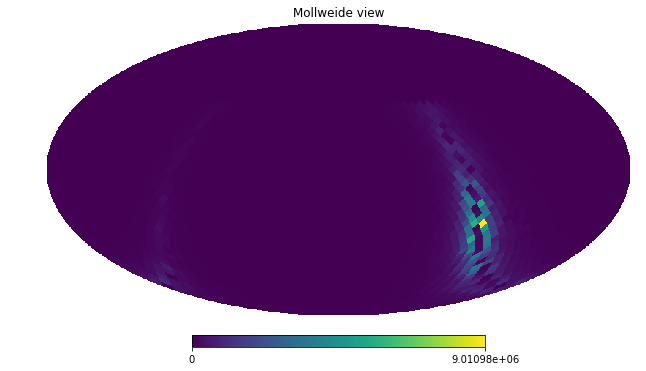

In [81]:
hp.mollview( np.array(starDens ) )

plot histogram of time gaps

In [19]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_dustv1.5_10yrs.db',
 'footprint_big_s

In [18]:
dblist_all[4:5]

['baseline_v1.5_10yrs.db']

### run for one opsim without proposal info

In [39]:
%%time 

# run for one opsim only

dicFoMtGaps = {}
dicNfields = {}
dicNstar = {}

dicFoM = {}
#dicFoM['db'] = dblist_all[4:5]
dicFoM['db'] = ['footprint_big_wfdv1.5_10yrs.db',]

nside = 16
# select mini survey footprint 
ipix_ms = None
sqlstr = 'night<4000 and note not like "%DD%" '
magdic = {'u':18, 'g':18, 'r':18, 'i':18, 'z':18, 'y':18}

dataRaw = {}  # save the raw metricValues.data for each opsim each fltpair; dataRaw[fltpair][dbname]

for fltpair in fltpairs:     
    dicFoMtGaps[fltpair] = []
    dicNfields[fltpair] = []
    dicNstar[fltpair] = []
    
    dataRaw[fltpair] = {}
    for dbname in dicFoM['db']: 
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
        else:
            tmin = 5/60/60/24
            tmax = 1.5/24 # 1.5 hour in days
            bins = np.linspace(tmin, tmax, 50)
            
        metricSky = runMetric(dbname, fltpair=fltpair, sqlstr=sqlstr, nside=nside, ipix_ms=ipix_ms, 
                                 mag_lim=[magdic[fltpair[0]], magdic[fltpair[1]]],
                                 tmin=tmin, tmax=tmax, bins=bins,
                                 filename=None, save_dT=True, dataout=True );
            
        arr = metricSky.metricValues.data 
        
        df = pd.DataFrame.from_records( arr[ arr != None ] )
        
        # count number of fields/stars above threshold 
        df['starDensity'] = starDens[ df['pixId'].values ] 
        idx = df['Nv'] > Nvth[fltpair]
        Nfields = df['Nv'][idx].shape[0]
        Nstar = np.sum( df['starDensity'][idx] )

        FoM_tgaps = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)
                
        dicFoMtGaps[fltpair].append (FoM_tgaps)
        dicNfields[fltpair].append(Nfields)
        dicNstar[fltpair].append(Nstar)
        
        dataRaw[fltpair][dbname] = df[['pixId', 'Dkl', 'FoM_i', 'Nv', 'dT_lim']]  
        
        print('>>>', fltpair, dbname, FoM_tgaps, Nfields, Nstar)
    
    df_fom = pd.DataFrame(dicFoMtGaps)
    df_fom.to_csv('df_tgapsFoM_{}.csv'.format(dbname), index=False)
    
    df_fom = pd.DataFrame(dicNfields)
    df_fom.to_csv('df_Nfields_{}.csv'.format(dbname), index=False)
    
    df_fom = pd.DataFrame(dicNstar)
    df_fom.to_csv('df_Nstars_{}.csv'.format(dbname), index=False)
    
    # save raw data to pickle
    pd.DataFrame( dataRaw ).to_pickle(outDir+'/tgaps_dataRaw_{}.pkl'.format(dbname),)

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 146196 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu footprint_big_wfdv1.5_10yrs.db 14307.928923071027 57 4547880
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 352556 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug footprint_big_wfdv1.5_10yrs.db 9048.751206724719 232 35469756
Healpix slicer using NSIDE=16, appr

Found 900195 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy footprint_big_wfdv1.5_10yrs.db 18835.126872703975 467 34380792
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 415701 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz footprint_big_wfdv1.5_10yrs.db 71683.31829812122 0 0
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 852405 visits
Running:  ['newMetricS

In [43]:
ls *.csv

df_Nfields_footprint_big_wfdv1.5_10yrs.db.csv
df_Nfields_wfd_v1.5.csv
df_Nstars_footprint_big_wfdv1.5_10yrs.db.csv
df_Nstars_wfd_v1.5.csv
df_tgapsFoM_footprint_big_wfdv1.5_10yrs.db.csv
df_tgapsFoM_wfd_v1.5.csv
tgapsFoM_WFD_v1.5.csv
tgaps_FoM_baseline_v1.5_10yrs.db.csv
tgaps_FoM_baseline_v1.5_GP.csv
tgaps_FoM_baseline_v1.5_LMC.csv
tgaps_FoM_baseline_v1.5_SMC.csv


In [44]:
# add footprint_big to dataframe 
for fomstr in ['tgapsFoM', 'Nstars', 'Nfields']:
    df_Nstar_fbig = pd.read_csv('df_{}_footprint_big_wfdv1.5_10yrs.db.csv'.format(fomstr))
    df_Nstar_fbig['db'] = 'footprint_big_wfdv1.5_10yrs.db'
    
    fomcsv = 'df_{}_wfd_v1.5.csv'.format(fomstr)
    df_fom = pd.read_csv(fomcsv)
    df_fom['db'] = dblist_all
    
    idx = int( np.where( df_fom['db']=='footprint_big_wfdv1.5_10yrs.db' )[0] )
    df_fom.loc[idx ] = df_Nstar_fbig.loc[0]
    
    df_fom.to_csv('{}_WFD_v1.5.csv'.format(fomstr), index=False)
    

In [81]:
df_fom.loc[31]

uu                           24106.8
ug                           19359.5
ur                           52384.2
ui                             31642
uz                               NaN
uy                           1754.14
gg                           49977.5
gr                           71343.2
gi                           43684.1
gz                           25322.7
gy                             53788
rr                            165469
ri                            102243
rz                           85194.3
ry                            117094
ii                            142661
iz                           75959.2
iy                            153248
zz                            103447
zy                            126912
yy                            137697
db    footprint_big_wfdv1.5_10yrs.db
Name: 31, dtype: object

In [9]:
%%time 

# run for baseline only

dicFoMtGaps = {}
dicNfields = {}
dicNstar = {}

dicFoM = {}
dicFoM['db'] = dblist_all[4:5]

nside = 16
# select mini survey footprint 
ipix_ms = None
sqlstr = "night<4000 and proposalId=1"
magdic = {'u':18, 'g':18, 'r':18, 'i':18, 'z':18, 'y':18}

dataRaw = {}  # save the raw metricValues.data for each opsim each fltpair; dataRaw[fltpair][dbname]

for fltpair in fltpairs:     
    dicFoMtGaps[fltpair] = []
    dicNfields[fltpair] = []
    dicNstar[fltpair] = []
    
    dataRaw[fltpair] = {}
    for dbname in dicFoM['db']: 
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
        else:
            tmin = 5/60/60/24
            tmax = 1.5/24 # 1.5 hour in days
            bins = np.linspace(tmin, tmax, 50)
            
        metricSky = runMetric(dbname, fltpair=fltpair, sqlstr=sqlstr, nside=nside, ipix_ms=ipix_ms, 
                                 mag_lim=[magdic[fltpair[0]], magdic[fltpair[1]]],
                                 tmin=tmin, tmax=tmax, bins=bins,
                                 filename=None, save_dT=True, dataout=True );
            
        arr = metricSky.metricValues.data 
        
        df = pd.DataFrame.from_records( arr[ arr != None ] )
        
        # count number of fields/stars above threshold 
        df['starDensity'] = starDens[ df['pixId'].values ] 
        idx = df['Nv'] > Nvth[fltpair]
        Nfields = df['Nv'][idx].shape[0]
        Nstar = np.sum( df['starDensity'][idx] )

        FoM_tgaps = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)
                
        dicFoMtGaps[fltpair].append (FoM_tgaps)
        dicNfields[fltpair].append(Nfields)
        dicNstar[fltpair].append(Nstar)
        
        dataRaw[fltpair][dbname] = df[['pixId', 'Dkl', 'FoM_i', 'Nv', 'dT_lim']]  
        
        print('>>>', fltpair, dbname, FoM_tgaps, Nfields, Nstar)
    
    df_fom = pd.DataFrame(dicFoMtGaps)
    df_fom.to_csv('df_tgapsFoM_{}.csv'.format(dbname), index=False)
    
    df_fom = pd.DataFrame(dicNfields)
    df_fom.to_csv('df_Nfields_{}.csv'.format(dbname), index=False)
    
    df_fom = pd.DataFrame(dicNstar)
    df_fom.to_csv('df_Nstar_{}.csv'.format(dbname), index=False)
    
    # save raw data to pickle
    pd.DataFrame( dataRaw ).to_pickle(outDir+'/tgaps_dataRaw_{}.pkl'.format(dbname),)


NameError: name 'dicFoM' is not defined

In [10]:
outDir

'/home/idies/workspace/Temporary/lixl/scratch/outDir'

In [12]:
dblist_all[4]

'baseline_v1.5_10yrs.db'

In [10]:

#df_baseline = pd.DataFrame( dataRaw )
df_baseline = pd.read_pickle(outDir+'/tgaps_dataRaw_baseline_v1.5_10yrs.db.pkl')
df_baseline

,uu,ug,ur,ui,uz,uy,gg,gr,gi,gz,...,rr,ri,rz,ry,ii,iz,iy,zz,zy,yy
baseline_v1.5_10yrs.db,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv dT_lim 0 1376...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv ...,...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...


In [135]:
dT = np.concatenate( df_baseline['uu']['baseline_v1.5_10yrs.db'] ['dT_lim'].values )


In [138]:
np.concatenate(dT).shape

(2468080,)

In [136]:
dT.shape

(1459,)

In [11]:

tmin = 5/60/60/24 # in days
tmax = 3e8/60./60./24    
# histogram in log space
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
tmin = 5/60/60/24
tmax = 1.5/24 # 1.5 hour in days
bins_lin = np.linspace(tmin, tmax, 50)


In [14]:
# prepare filter_dict
fltpairs = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]

filter_dict = {}
for fltpair in fltpairs:
    filter_dict[fltpair] = {}
    dT = np.concatenate( df_baseline[fltpair]['baseline_v1.5_10yrs.db'] ['dT_lim'].values )
    filter_dict[fltpair]['dT'] = dT
    
    if fltpair[0]==fltpair[1]:
        bins = bins_log
        values, bins_ = np.histogram(dT, bins=bins);
    else:
        bins = bins_lin
        values, bins_ = np.histogram(dT, bins=bins);

    Dkl = get_Dkl(values)
    
    filter_dict[fltpair]['Dkl'] = Dkl
    print(fltpair, len(dT),  Dkl)

uu 2468080 5.398810362201651
ug 70578 2.1134440233740857
ur 66368 1.375961964396934
ui 9339 0.5016790761842163
uz 0 nan
uy 50 6.081792190269123
gg 5330741 5.312331831053857
gr 127608 1.6617405390844637
gi 24946 1.171693868930305
gz 987 0.43786301783702203
gy 494 0.61516906181712
rr 29186938 5.787795755226195
ri 180466 1.727938366489182
rz 14403 0.9063908925784445
ry 2043 0.40171911859405973
ii 29609453 6.215477775914526
iz 206627 1.8262000625825658
iy 38139 0.7669018018944066
zz 23694537 6.00344538601065
zy 174632 1.3822756018255706
yy 26094240 5.950768567363721


uu 2468080
ug 70578
ur 66368
ui 9339
uz 0
uy 50
gg 5330741
gr 127608
gi 24946
gz 987
gy 494
rr 29186938
ri 180466
rz 14403
ry 2043
ii 29609453
iz 206627
iy 38139
zz 23694537
zy 174632
yy 26094240


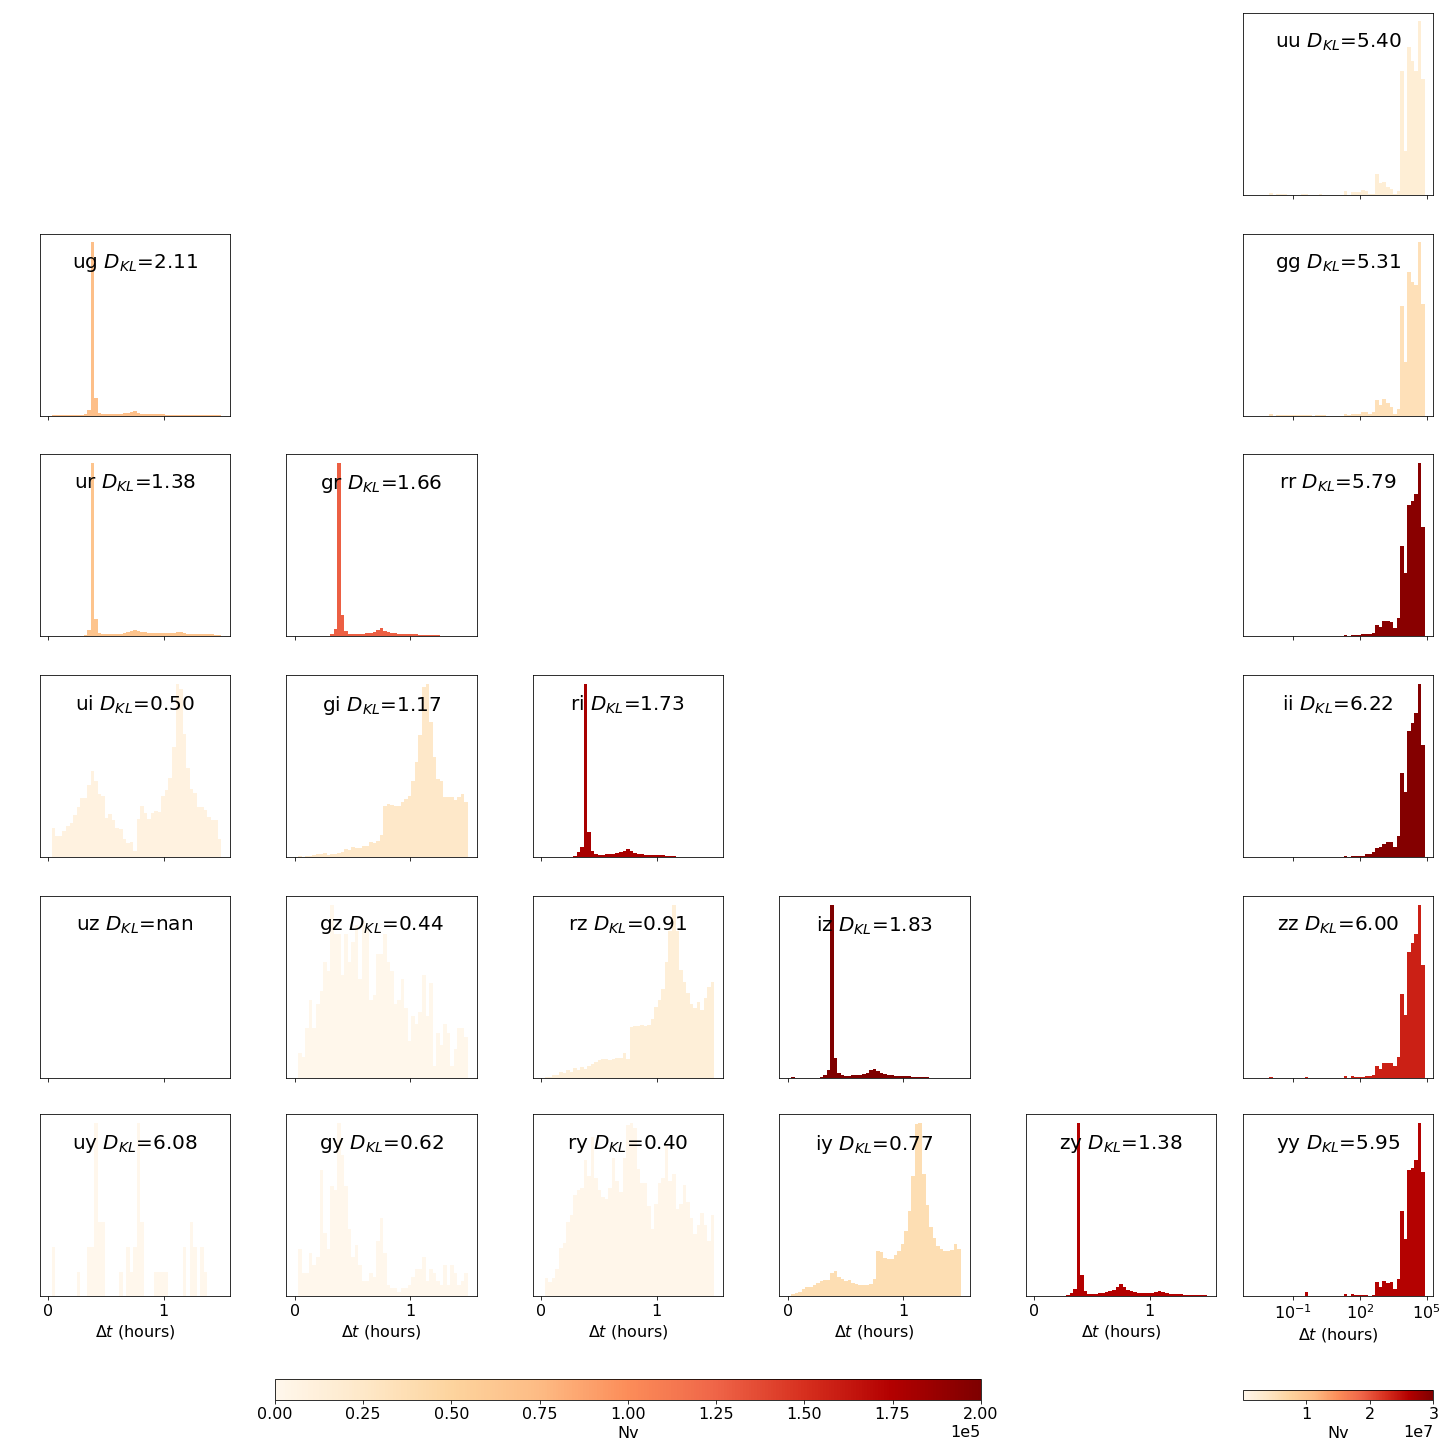

In [17]:

tmin = 5/60/60 # in hour
tmax = 3e8/60./60.   
# histogram in log space
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
tmin = 5/60/60
tmax = 1.5 # 1.5 hour in days
bins_lin = np.linspace(tmin, tmax, 50)


plot_hist_colorbar(filter_dict, figsize=(20, 20), histbins=[bins_log, bins_lin], 
                   cumulative=False, density=False, histtype='stepfilled')


In [28]:
filter_dict['gg']['dT']

array([ 356.00360217, 1109.83084951,  753.82724734, ..., 2187.98940173,
       2544.03327195,  745.98921647])

Text(0, 0.5, 'Nv (M)')

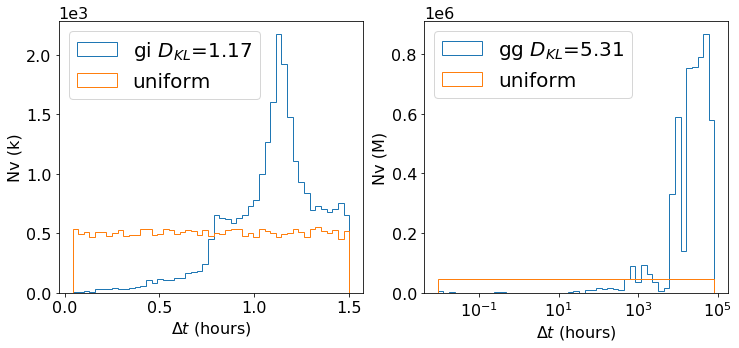

In [16]:
# plot a distribution with uniform one 

key = 'gi'
dT = filter_dict[key]['dT'] * 24
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

dkltex = '$D_{KL}$'
title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])

uni = np.random.uniform(low=dT.min(), high=dT.max(), size=len(dT) )

bins_lin = np.linspace(dT.min(), dT.max(), 50)

ax = axs[0]
_ = ax.hist(dT, bins=bins_lin, label=title, 
                          cumulative=False, density=False, histtype='step' );
_ = ax.hist(uni, bins=bins_lin, label='uniform', alpha=1,
                          cumulative=False, density=False, histtype='step'  );
ax.legend(loc='upper left')
ax.set_xlabel('$\Delta t$ (hours)')
ax.set_ylabel('Nv (k)')
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0), )

# --------------------------
key = 'gg'
dT = filter_dict[key]['dT'] * 24

low = np.log(dT.min())
high = np.log(dT.max())
uni = np.power(10, np.random.uniform(low=low, high=high, size=len(dT) ) )

title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])


tmin = dT.min()
tmax = dT.max()
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)

ax = axs[1]
_ = ax.hist(dT, bins=bins_log, label=title, 
                          cumulative=False, density=False, histtype='step' );

_ = ax.hist(uni, bins=bins_log, label='uniform', alpha=1,
                          cumulative=False, density=False, histtype='step'  );
ax.set_xscale('log')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), )
ax.legend(loc='upper left')
ax.set_xlabel('$\Delta t$ (hours)')
ax.set_ylabel('Nv (M)')

# fig.suptitle(title)

In [15]:
def plot_hist_colorbar(filter_dict, figsize=(20, 20), histbins=[50, 50], vmax=10000, **kwargs):
    """plot histogram
    Inputs:
        filter_dict: ['uu']['dT']
        
    """
    #fig, axs = plt.subplots(6, 6, figsize=figsize, constrained_layout=True); # 6 axes on a 2x3 grid
    fig, axs = plt.subplots(6, 6, figsize=figsize, constrained_layout=True);
    flt = ['u', 'g', 'r', 'i', 'z', 'y']
    fdict = {'u':0, 'g':1, 'r':2, 'i':3, 'z':4, 'y':5}
    cmap = matplotlib.cm.OrRd
    for i, f0 in enumerate(flt):
        for f1 in flt[i:]:
            key = '{}{}'.format(f0, f1)
            dT = filter_dict[key] ['dT']
            #eDkl = filter_dict[key] ['eDkl']
            
            #title = '{}{} Nv={} $D_k$={:.2f}'.format(f0, f1, len(dT), filter_dict[key] ['Dkl'])                   
            dkltex = '$D_{KL}$'
            title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])

            if f0==f1:
                vmin1 = 100000
                vmax1 = 30000000
                norm = matplotlib.colors.Normalize(vmin=vmin1, vmax=vmax1)
                m1 = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
                
                ax = axs[fdict[f0], 5]
                axs[fdict[f0], fdict[f1]].axis('off')
                # plot distribution
                Nv = len(dT)
                if Nv!=0:
                    values, bins, _ = ax.hist(dT*24, bins=histbins[0], color=m1.to_rgba(Nv), label=title, **kwargs );
                    ax.legend(loc='upper center', handlelength=0, handletextpad=0, frameon=False)
                ax.set_xscale("log")
                
            else:
                axs[fdict[f0], fdict[f1]].axis('off')
                ax = axs[fdict[f1], fdict[f0]]
                
                vmin2 = 0
                vmax2 = 200000
                norm = matplotlib.colors.Normalize(vmin=vmin2, vmax=vmax2)
                m2 = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

                # plot distribution
                Nv = len(dT)
                #if Nv!=0:
                values, bins, _ = ax.hist(dT*24, bins=histbins[1], color=m2.to_rgba(Nv), label=title, **kwargs );
                ax.legend(loc='upper center', handlelength=0, handletextpad=0, frameon=False)
            
            # ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

            # ax.set_title(title)
            
            if fdict[f1]!=5:
                ax.get_xaxis().set_ticklabels([])
                
            ax.get_yaxis().set_ticks([])
            #ax.set_ylabel('N fields')
            print(key, Nv)
    for i in range(6):
        #axs[i, i].axis('off')
        axs[i, 5].axis('on')    
        axs[5, i].set_xlabel('$\Delta t$ (hours)')
          
    # cbar diagonal
    m1.set_array(np.linspace(vmin1, vmax1) ) 
    cbar1 = fig.colorbar(mappable=m1, ax=axs[:,5], shrink=1, location='bottom')
    cbar1.set_label('Nv')
    #cbar1.formatter.set_powerlimits((0, 0))
    #cbar1.update_ticks()

    # for off diagonal
    m2.set_array(np.linspace(vmin2, vmax2) ) 
    cbar2 = fig.colorbar(mappable=m2, ax=axs[:,:5], shrink=.6, location='bottom')
    cbar2.set_label('Nv')
    cbar2.set_clim([0, vmax2])

    cbar2.formatter.set_powerlimits((0, 0))
    cbar2.update_ticks()
    
    #fig.suptitle(dbfile, fontsize=16)
    #fig.savefig('{}.png'.format(filename), dpi=200)
    #fig.tight_layout( pad=1.0 )



#### utils

In [1]:
# coordinates transform
def pix2radec(nside, ipix, degree=True):
    """from ipix to ra/dec"""
    
    theta, phi = hp.pix2ang(nside, ipix)
    ra = phi
    dec = np.pi/2. - theta
    if degree:
        ra = np.rad2deg(ra)
        dec = np.rad2deg(dec)
    return ra, dec
    